# BOOKING DATA ANALYSIS

### Importing the Necessary Libraries for the Analysis

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
from IPython.core.display import HTML

### Reading the excel file

In [2]:
df = pd.read_excel(r"C:/Users/35387/Desktop/MiQDigital Assessments/Travel_data_set.xlsx")

In [3]:
df.head()

,Date,Cookie ID,Source,Hotel Name,No. of nights,Room Type,Date of Arrival,Hotel location city,Hotel location country,Customer location - city,Customer location - country,Hotel Tier,Payment Type,Currency,Total Price,Customer language,No. of rooms
0,2017-09-25 00:03:54,5814471915578251610,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,DoubleTree Club by Hilton Hotel Boston Bayside,4,ONE KING BED,2017-11-01,"Boston,MA",US,"OAK HILL,VA",US,Silver,AX,USD,748.44,en,1
1,2017-09-25 00:10:02,1096121688080343035,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,Hilton Garden Inn Pigeon Forge,2,2 QUEEN BEDS,2017-10-06,"Pigeon Forge,TN",US,"ALBERTVILLE,AL",US,Blue,DS,USD,438.00,en,1
2,2017-09-25 00:15:02,8909957529622268233,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,Hilton Los Angeles/Universal City,5,2 QUEEN BEDS,2018-05-13,"Universal City,CA",US,"SAN JOSE,CA",US,Gold,MC,USD,225.00,en,1
3,2017-09-25 00:20:29,7221406028471065999,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,Hampton Inn Dover,2,2 QNS MICROWV/FRIDGE NS,2018-01-05,"Dover,NH",US,"SHELBURNE,VT",US,Gold,AX,USD,18.84,en,1
4,2017-09-25 00:26:37,7373995207228845031,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:55.0) ...,Hampton Inn Santee-I-95,1,1 KING BED OTHER NONSMOK,2017-10-14,"Santee,SC",US,"FAYETTEVILLE,NY",US,Silver,VI,USD,132.05,en,1


### Checking for fair bit of information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270887 entries, 0 to 270886
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         270887 non-null  datetime64[ns]
 1   Cookie ID                    270887 non-null  int64         
 2   Source                       270887 non-null  object        
 3   Hotel Name                   270887 non-null  object        
 4   No. of nights                270887 non-null  int64         
 5   Room Type                    270887 non-null  object        
 6   Date of Arrival              270887 non-null  datetime64[ns]
 7   Hotel location city          270887 non-null  object        
 8   Hotel location country       270872 non-null  object        
 9   Customer location - city     270886 non-null  object        
 10  Customer location - country  270885 non-null  object        
 11  Hotel Tier                

In [5]:
df.describe()

,Cookie ID,No. of nights,Total Price,No. of rooms
count,2.708870e+05,270887.000000,2.708870e+05,270887.000000
mean,4.607840e+18,1.928834,3.636500e+03,1.096011
std,2.655893e+18,1.840666,1.617917e+05,0.409248
min,2.921000e+03,0.000000,0.000000e+00,1.000000
25%,2.315169e+18,1.000000,9.900000e+01,1.000000
50%,4.609011e+18,1.000000,1.754200e+02,1.000000
75%,6.909598e+18,2.000000,3.690000e+02,1.000000
max,9.223284e+18,211.000000,5.335200e+07,9.000000


In [6]:
df.shape

(270887, 17)

### Datatypes of respective features of the data

In [7]:
df.dtypes

Date                           datetime64[ns]
Cookie ID                               int64
Source                                 object
Hotel Name                             object
No. of nights                           int64
Room Type                              object
Date of Arrival                datetime64[ns]
Hotel location city                    object
Hotel location country                 object
Customer location - city               object
Customer location - country            object
Hotel Tier                             object
Payment Type                           object
Currency                               object
Total Price                           float64
Customer language                      object
No. of rooms                            int64
dtype: object

### Checking the number of null values within the dataset

In [8]:
df.isnull().sum()

Date                             0
Cookie ID                        0
Source                           0
Hotel Name                       0
No. of nights                    0
Room Type                        0
Date of Arrival                  0
Hotel location city              0
Hotel location country          15
Customer location - city         1
Customer location - country      2
Hotel Tier                       0
Payment Type                   289
Currency                         0
Total Price                      0
Customer language                1
No. of rooms                     0
dtype: int64

In [9]:
df = df.rename(columns = {'Hotel Tier': 'Hotel_Tier', 'Total Price': 'Total_Price', 'No. of rooms': 'No_of_rooms'}, inplace = False)

### Hotel Tier Analysis based on bookings

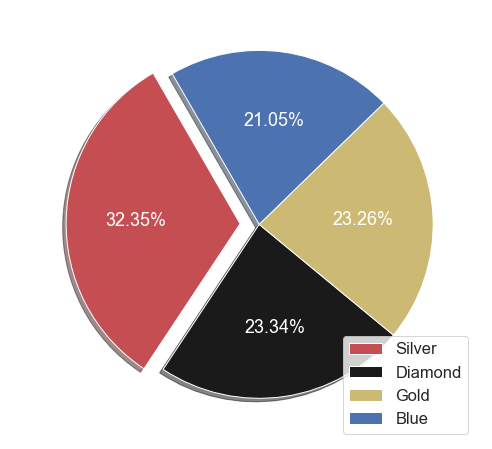

In [90]:
Hotel_Tier = ["Silver", "Diamond", "Gold", "Blue"]
booking = df.Hotel_Tier.value_counts()
color = ["r", "k", "y", "b"]

plt.figure(figsize = (10, 8))
plt.pie(booking, labels = Hotel_Tier, colors = color, explode = (0.11, 0, 0, 0), textprops = {'color':"w"}, autopct = "%.2f%%", shadow = True, startangle = 120)

plt.legend()

plt.show();

<AxesSubplot:xlabel='Hotel_Tier', ylabel='count'>

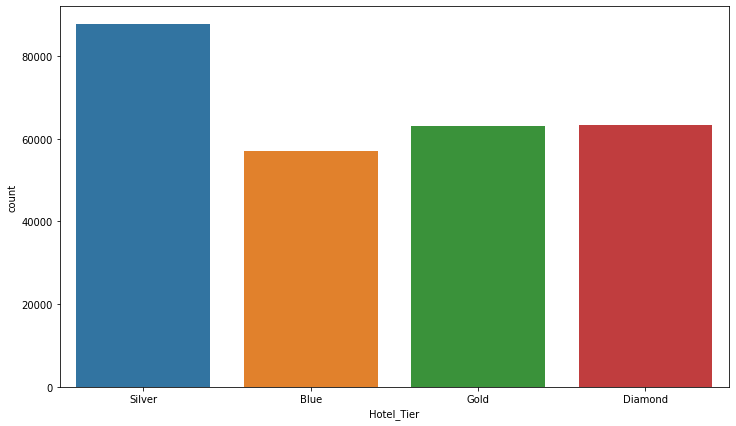

In [12]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Hotel_Tier',data=df)

In [13]:
df["Hotel_Tier"].value_counts()

Silver     87637
Diamond    63214
Gold       63019
Blue       57017
Name: Hotel_Tier, dtype: int64

In [17]:
df["No_of_rooms"].value_counts()

1    250753
2     16780
3      2104
4       664
5       256
6       150
8        68
7        59
9        53
Name: No_of_rooms, dtype: int64

### Creating a dictionary using the existing excel sheet to convert all currencies into USD

In [91]:
list1 = {"AMD":482.36, "AED":3.67, "ARS":17.66, "AUD":1.31, "AZN":1.7, "BRL":3.28, "CAD":1.29, "CHF": 1, "USD": 1, "CNY":6.63, "COP":3028.72, "CZK":22.05, "EUR":0.86, "FJD":2.08, "GBP":0.75, "HKD":7.8, "IDR":13564.99, "INR":64.75, "ISK":105.39, "JOD":0.71, "JPY":113.45, "KRW":1117.99, "KWD":0.3, "MAD":9.5, "MXN":19.18, "MYR":4.23, "NAD":14.17, "NGN":360, "NZD":1.46, "OMR":0.38, "PHP":51.63, "PLN":3.65, "QAR":3.8, "RON":3.95, "RUB":58.45, "SAR":3.75, "SEK":8.37, "SGD": 1.36, "THB":33.28, "TRY":3.81, "XAF":563.59, "XPF":102.53, "ZAR": 14.16}

In [92]:
type(list1)

dict

In [93]:
for i in list1:
    print(i)

AMD
AED
ARS
AUD
AZN
BRL
CAD
CHF
USD
CNY
COP
CZK
EUR
FJD
GBP
HKD
IDR
INR
ISK
JOD
JPY
KRW
KWD
MAD
MXN
MYR
NAD
NGN
NZD
OMR
PHP
PLN
QAR
RON
RUB
SAR
SEK
SGD
THB
TRY
XAF
XPF
ZAR


In [94]:
t = []
for i in df["Currency"]:
    for key, value in list1.items():
        if i == key:
            t.append(value)

In [23]:
df["New"] = t

In [24]:
df["Price_In_USD"] = df["Total_Price"]/df["New"]

### Dropping a column as it is no more useful

In [25]:
df = df.drop("New", axis=1)

### Checking once for the conversion if it has been succesfully made

In [26]:
df.tail(20)

,Date,Cookie ID,Source,Hotel Name,No. of nights,Room Type,Date of Arrival,Hotel location city,Hotel location country,Customer location - city,Customer location - country,Hotel_Tier,Payment Type,Currency,Total_Price,Customer language,No_of_rooms,Price_In_USD
270867,2017-09-29 21:52:21,858866822190105525,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,Hilton Cleveland Downtown,3,HIGH FLOOR-2 QUEEN BEDS,2017-11-22,"Cleveland,OH",US,"BOCA RATON,FL",US,Silver,MC,USD,421.35,en,1,421.35000
270868,2017-09-29 21:58:19,5309103886642976543,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; ...,Hilton Crystal City at Washington Reagan Natio...,2,1 KING BED,2017-10-16,"Arlington,VA",US,"CHULA VISTA,CA",US,Diamond,AX,USD,550.00,en,1,550.00000
270869,2017-09-29 22:03:09,8090910188726160616,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,Hilton Garden Inn Times Square,2,1 KING CORNER SOFABED NS,2017-12-15,"New York,NY",US,"MARIETTA,GA",US,Silver,VI,USD,627.30,en,1,627.30000
270870,2017-09-29 22:08:35,1494172580651712481,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,DoubleTree by Hilton Hotel Jacksonville Airport,1,2 QUEEN BEDS,2017-10-20,"Jacksonville,FL",US,"SAN DIEGO,CA",US,Diamond,AX,USD,0.00,en,1,0.00000
270871,2017-09-29 22:14:57,7306297704832500198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,Hilton Sedona Resort at Bell Rock,1,"1 KING PREMIUM SUITE NS,1 KING PREMIUM SUITE NS",2017-12-30,"Sedona,AZ",US,"ORLANDO,FL",US,Blue,MC,USD,720.00,en,2,720.00000
270872,2017-09-29 22:23:30,7189689319005691677,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Hilton Garden Inn Kauai Wailua Bay,4,1KG JUNIOR SUITE OCEAN VW,2017-10-02,"Kapaa,HI",US,"GLOUCESTER,VA",US,Blue,VI,USD,819.28,en,1,819.28000
270873,2017-09-29 22:31:01,7851511482026514605,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:55.0) G...,Hilton Garden Inn Waikiki Beach,3,1 KING W SOFA STD CITY VW,2017-10-02,"Honolulu,HI",US,"BELLEVILLE,IL",US,Diamond,AX,USD,531.00,en,1,531.00000
270874,2017-09-29 22:37:43,3635210593875417196,Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:1...,Hampton Inn by Hilton Silao-Aeropuerto Bajio,1,1KING W/FRIDGE NONSMOKING,2017-10-04,"Silao,GUA",MX,"HUBER HEIGHTS,OH",US,Diamond,VI,MXN,1749.30,en,1,91.20438
270875,2017-09-29 22:44:56,2823925027440428482,Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,Hilton Garden Inn Savannah Midtown,1,2 QUEEN BEDS,2017-09-29,"Savannah,GA",US,"SAVANNAH,GA",US,Silver,MC,USD,35.00,en,1,35.00000
270876,2017-09-29 22:53:26,2579676412656676488,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:56.0) G...,Hilton Los Angeles Airport,1,2 DOUBLE BEDS,2017-11-29,"Los Angeles,CA",US,"OXFORD,AL",US,Silver,VI,USD,89.50,en,1,89.50000


### Total number of unique currencies

In [28]:
df["Currency"].value_counts().count()

43

### Plotting highest amount spent by different Currencies before and after conversion into USD

In [30]:
td = df.groupby(["Currency"]).Total_Price.sum(["value_counts"]).sort_values(ascending = False).head(10)

In [31]:
td

Currency
IDR    5.595576e+08
KRW    1.786125e+08
JPY    8.401339e+07
USD    6.846677e+07
COP    4.006779e+07
ISK    1.138033e+07
THB    6.604804e+06
NGN    3.517884e+06
XPF    3.373360e+06
CNY    3.245072e+06
Name: Total_Price, dtype: float64

Text(0.5, 1.0, 'Before Converting currencies into USD')

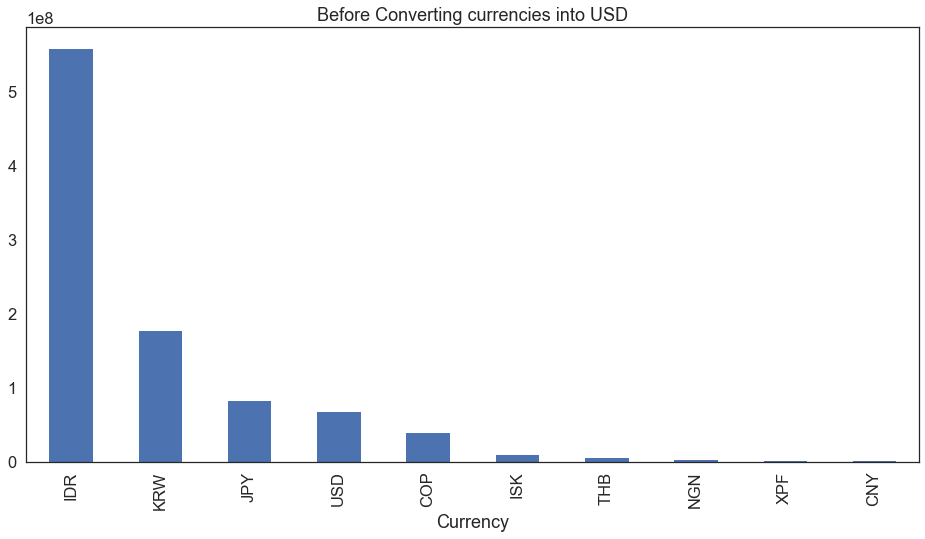

In [95]:
plt.figure(figsize=(16,8))
td.plot(kind = "bar")
plt.title("Before Converting currencies into USD")

In [96]:
te = df.groupby(["Currency"]).Price_In_USD.sum(["value_counts"]).sort_values(ascending = False).head(10)

In [97]:
te

Currency
USD    6.846677e+07
GBP    3.271563e+06
EUR    2.794624e+06
CAD    1.095296e+06
JPY    7.405323e+05
CNY    4.894529e+05
AED    3.468690e+05
AUD    3.434920e+05
SGD    2.000529e+05
THB    1.984617e+05
Name: Price_In_USD, dtype: float64

Text(0.5, 1.0, 'After converting all currencies amount to USD standard')

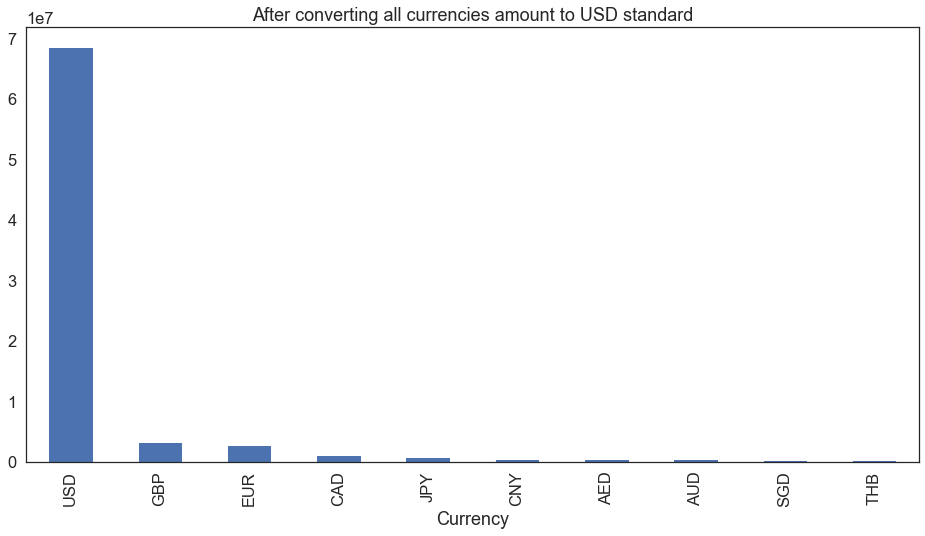

In [98]:
plt.figure(figsize = (16,8))
te.plot(kind="bar")
plt.title("After converting all currencies amount to USD standard")

<AxesSubplot:title={'center':'After converting currencies to USD'}, xlabel='Currency'>

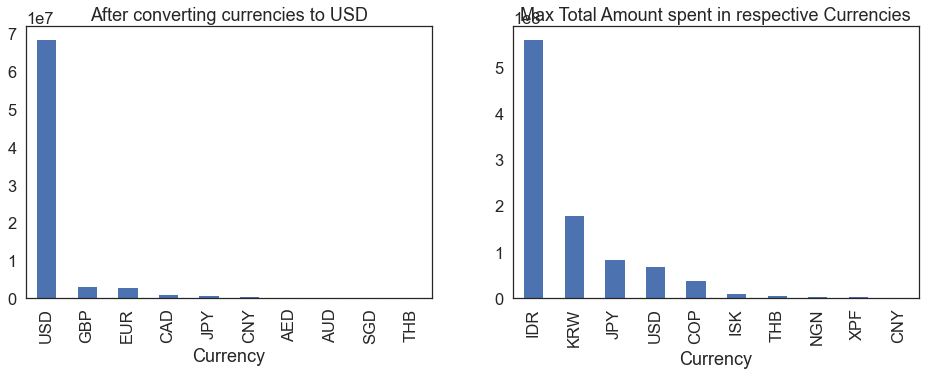

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
td.plot(kind="bar", ax = ax[1], title = "Max Total Amount spent in respective Currencies")
te.plot(kind="bar", ax=ax[0], title = "After converting currencies to USD")

In [37]:
df["Hotel location country"].value_counts()

US    234079
GB      9839
CA      4144
CN      2515
DE      1984
       ...  
AM         4
ME         4
NC         4
GE         4
MM         3
Name: Hotel location country, Length: 93, dtype: int64

### Number of countries which has made less Revenue

Text(0.5, 1.0, 'Number of countries which has made less Revenue')

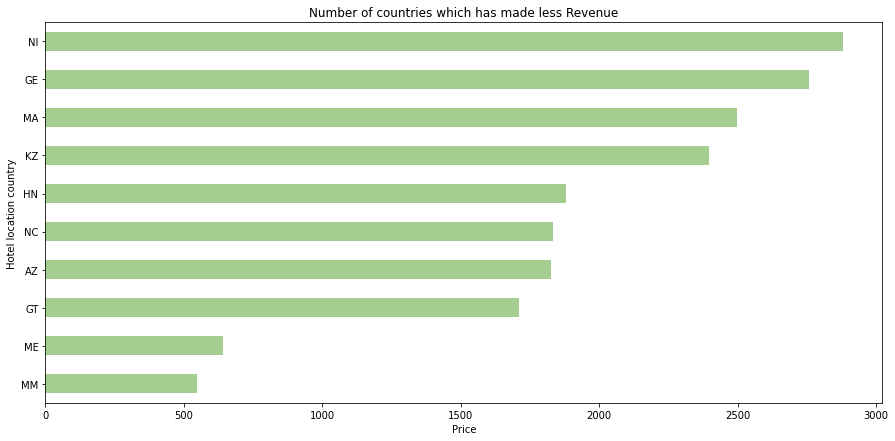

In [64]:
plt.figure(figsize=(15,7))
ee = df.groupby(["Hotel location country"])["Price_In_USD"].sum().sort_values().head(10).plot(kind="barh",cmap="crest")
plt.xlabel("Price")
plt.title("Number of countries which has made less Revenue")

In [39]:
ee

Hotel location country
MM     546.750000
ME     640.116279
GT    1709.960000
AZ    1827.517647
NC    1834.448454
HN    1880.840000
KZ    2396.850000
MA    2496.357895
GE    2757.820000
NI    2879.080000
Name: Price_In_USD, dtype: float64

In [40]:
df.columns

Index(['Date', 'Cookie ID', 'Source', 'Hotel Name', 'No. of nights',
       'Room Type', 'Date of Arrival', 'Hotel location city',
       'Hotel location country', 'Customer location - city',
       'Customer location - country', 'Hotel_Tier', 'Payment Type', 'Currency',
       'Total_Price', 'Customer language', 'No_of_rooms', 'Price_In_USD'],
      dtype='object')

In [42]:
df["No_of_rooms"].value_counts()

1    250753
2     16780
3      2104
4       664
5       256
6       150
8        68
7        59
9        53
Name: No_of_rooms, dtype: int64

In [43]:
df["No_of_rooms"].agg(["value_counts"]).head()

,value_counts
1,250753
2,16780
3,2104
4,664
5,256


### Frequency of number of rooms booked overall

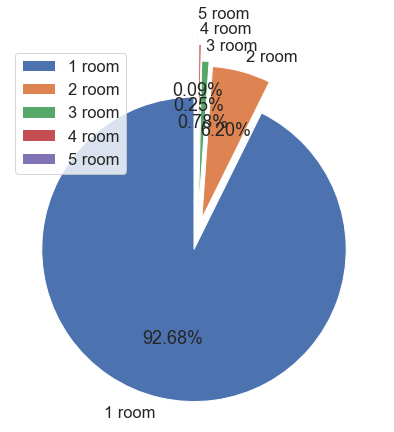

In [103]:
No_of_rooms = ["1 room", "2 room", "3 room", "4 room", "5 room"]
values = df.No_of_rooms.value_counts().head()

plt.figure(figsize = (10, 7))
plt.pie(values, labels = No_of_rooms, explode = (0.1, 0.11, 0.14, 0.25, 0.350), autopct = "%.2f%%",startangle = 90)
plt.legend()

plt.show();

In [104]:
df["Hotel Name"].value_counts()

Hilton Los Angeles Airport                            1052
Hilton Hawaiian Village Waikiki Beach Resort           712
New York Hilton Midtown                                647
Tropicana Las Vegas - a DoubleTree by Hilton Hotel     633
Hilton Anaheim                                         582
                                                      ... 
Embassy Suites by Hilton Houston West - Katy             1
Hampton Inn Kernersville                                 1
Hilton Garden Inn Phoenix-Tempe ASU Research Park        1
Tru by Hilton Tallahassee Central                        1
Hilton Garden Inn Sivas                                  1
Name: Hotel Name, Length: 4140, dtype: int64

### The hotels with good value counts of Hotel Tier

Text(0.5, 0, 'Value counts of bookings')

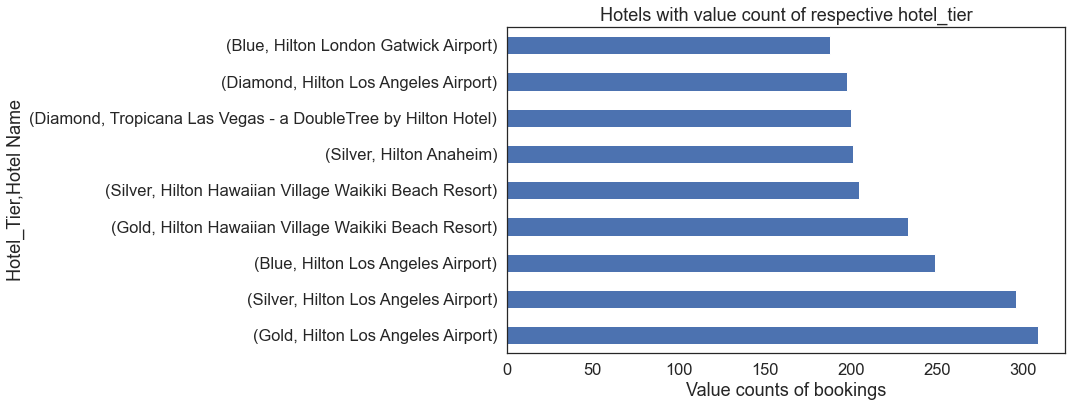

In [105]:
plt.figure(figsize=(10,6))
df.groupby(["Hotel_Tier"])["Hotel Name"].agg("value_counts").sort_values(ascending=False).head(9).plot(kind="barh")
plt.title("Hotels with value count of respective hotel_tier")
plt.xlabel("Value counts of bookings")

In [83]:
df["Payment Type"].value_counts()

VI    130420
AX     81029
MC     53671
DS      4952
DC       220
JC       186
CU       120
Name: Payment Type, dtype: int64

### Payment type opted for different Hotel Tiers

<AxesSubplot:xlabel='Payment Type', ylabel='count'>

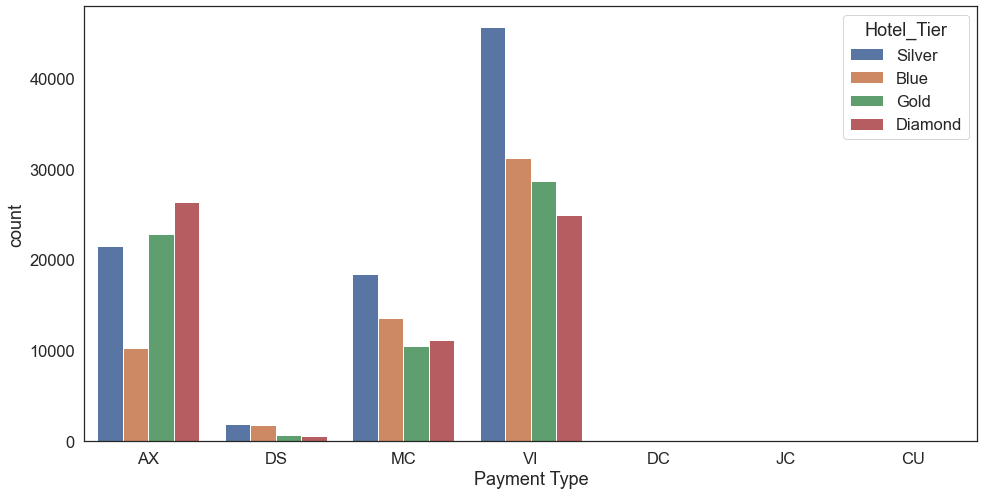

In [89]:
plt.figure(figsize=(16,8))
sns.countplot(x = "Payment Type", data=df, hue = "Hotel_Tier")

In [83]:
df.groupby(["Hotel_Tier"])["Price_In_USD"].mean().sort_values(ascending=False)

Hotel_Tier
Blue       349.603650
Diamond    307.224925
Silver     277.874506
Gold       249.384326
Name: Price_In_USD, dtype: float64

In [93]:
df["Total_Price"].mean()

3636.5001606204805